In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import joblib


In [2]:
from DCOP import run_dsan_experiment
model = joblib.load('dsan_model.pkl')
num_agents_list = [10, 25, 50, 75, 90, 100]
edge_density_list = [0.1, 0.25, 0.5, 0.75, 0.9, .99]
graph_types = ['complete','erdos_renyi', 'barabasi_albert',]
dsan_temperatures = [0.75, 1.0, 2.0, 5.0, 10.0]
dsa_thresholds = [0.1, 0.25, 0.5, .75, 0.9, 0.99]
num_actions_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
num_iterations = [50, 100, 200, 500, 1000]
cost_ranges = [4, 11, 51, 101, 501]

In [8]:
t_vals = [0.75, 1.0, 2.0, 5.0, 10.0]
t_costs = { t: [] for t in t_vals}
best_costs = []
pbar = tqdm(total=1000)
i = 0
while i < 1000:
    # generate a random problem
    n_agent = np.random.choice(num_agents_list)
    e_density = np.random.choice(edge_density_list)
    g_type = np.random.choice(graph_types)
    n_actions = np.random.choice(num_actions_list)
    n_iter = np.random.choice(num_iterations)
    c_range = np.random.choice(cost_ranges)

    #preprocess g_type to 0,1,2
    g_type_num = {'complete': 0, 'erdos_renyi': 1, 'barabasi_albert': 2}[g_type]

    # make predictions
    predictions = {}
    for t in t_vals:
        df = pd.DataFrame({'num_agents': [n_agent], 'edge_density': [e_density], 'graph_type': [g_type_num], 'dsan_temperature': [t], 'num_actions': [n_actions], 'num_iterations': [n_iter], 'cost_range': [c_range]})
        # make a prediction
        y_pred = model.predict(df)
        predictions[t] = y_pred[0]
        
    #print(predictions)
    best_t = min(predictions, key=predictions.get)
    #print(best_threshold)
    # t_costs[best_threshold].append(predictions[best_threshold])

    try:
        min_cost = run_dsan_experiment(num_agents=n_agent, edge_density=e_density, graph_type=g_type, dsan_temperature=best_t, num_actions=n_actions, niter=n_iter, cost_range=c_range, experiment = 'dsan_dataset', path = './DCOP_GRAPHS/DSAN' , file_name = f'{n_agent}_{e_density}_{g_type}_{best_t}_{n_actions}_{n_iter}_{c_range}')
        t_costs[best_t].append(min_cost)
        best_costs.append(min_cost)
        i += 1
        pbar.update(1)
    except:
        print('error', i)
        continue
        

best_cost = np.mean(best_costs)
# std_dev = np.std(best_costs)
# mean_error = std_dev / np.sqrt(len(best_costs))
print(best_cost)
# get the mean of the costs
predicted_t_costs_arr = t_costs.copy()
t_costs = {k: sum(v)/len(v) for k,v in t_costs.items() if len(v) > 0}


print(t_costs)

predicted_t_costs = t_costs.copy()

100%|██████████| 1000/1000 [6:01:25<00:00, 19.68s/it]   

52.34843363529429
{0.75: np.float64(45.55679832875077), 1.0: np.float64(40.052360040176076), 2.0: np.float64(35.18940718797875), 5.0: np.float64(51.144869844204685), 10.0: np.float64(87.4839225201367)}


{0.75: np.float64(78.75857300313042), 1.0: np.float64(66.50172406818426), 2.0: np.float64(56.98151436865913), 5.0: np.float64(73.0858483955564), 10.0: np.float64(74.96239531194344)}


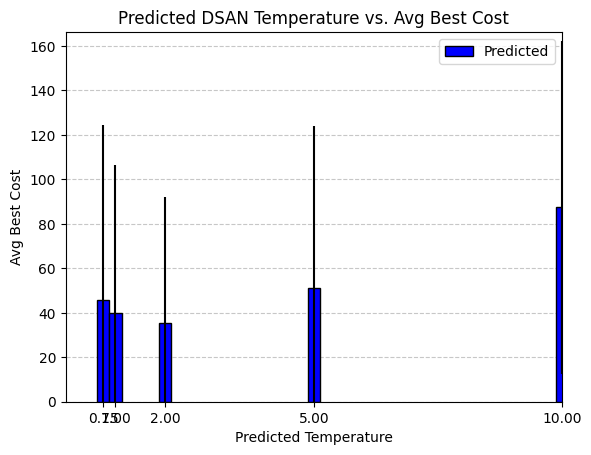

<Figure size 640x480 with 0 Axes>

In [20]:

# make std_dev dict
pred_std_dev = {k: np.std(v) for k,v in predicted_t_costs_arr.items()}
pred_std_dev = {k:v for k,v in pred_std_dev.items() if v > 0}
print(pred_std_dev)
plt.bar(predicted_t_costs.keys(), predicted_t_costs.values(), yerr = pred_std_dev.values(), width=.25, color='b', label='Predicted', edgecolor='black',  zorder=2)

# plot standard deviation
# make std_dev dict

# plt.errorbar(predicted_t_costs.keys(), predicted_t_costs.values(), yerr=std_dev.values(), fmt='o', color='r', label='Standard Deviation', zorder=3)


plt.ylim(0, max(predicted_t_costs.values()) + max(pred_std_dev.values()))  # Adjust the upper limit as needed
plt.xlim(0, 1)
plt.xticks(t_vals)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Predicted Temperature')
plt.ylabel('Avg Best Cost')
plt.title('Predicted DSAN Temperature vs. Avg Best Cost')
plt.legend()
plt.show()
plt.clf()


In [10]:
t_vals = [0.75, 1.0, 2.0, 5.0, 10.0]

pbar_t = tqdm(total=6)

dsan_temp = [0.75, 1.0, 2.0, 5.0, 10.0]
t_costs_arr = {}
t_costs = {}
for t in dsan_temp:
    best_costs = []
    i = 0
    pbar = tqdm(total=250)
    while i < 250:
        # generate a random problem
        n_agent = np.random.choice(num_agents_list)
        e_density = np.random.choice(edge_density_list)
        g_type = np.random.choice(graph_types)
        n_actions = np.random.choice(num_actions_list)
        n_iter = np.random.choice(num_iterations)
        c_range = np.random.choice(cost_ranges)


        min_cost = run_dsan_experiment(num_agents=n_agent, edge_density=e_density, graph_type=g_type, dsan_temperature=t, num_actions=n_actions, niter=n_iter, cost_range=c_range, experiment = 'dsa_dataset', path = './DCOP_GRAPHS/DSA',  file_name = f'{n_agent}_{e_density}_{g_type}_{t}_{n_actions}_{n_iter}_{c_range}')
        best_costs.append(min_cost)
        i += 1
        pbar.update(1)

    t_costs_arr[t] = best_costs        
    best_cost = np.mean(best_costs)
    t_costs[t] = best_cost
    pbar_t.update(1)

print(t_costs)
static_t_costs = t_costs.copy()
static_t_costs_arr = t_costs_arr.copy()



100%|██████████| 1000/1000 [14:36:57<00:00, 52.62s/it]























































































































































































































































100%|██████████| 250/250 [1:29:30<00:00, 21.48s/it]























































































































































































































































100%|██████████| 250/250 [1:28:56<00:00, 21.35s/it]




























































































































































































































































{0.75: np.float64(54.05765944409802), 1.0: np.float64(49.84793936332617), 2.0: np.float64(46.0556536659259), 5.0: np.float64(49.68777216153954), 10.0: np.float64(51.867985289149956)}


{0.75: np.float64(77.16445706602913), 1.0: np.float64(72.52756146596764), 2.0: np.float64(70.94400197032064), 5.0: np.float64(70.60850643654095), 10.0: np.float64(76.15255956052937)}


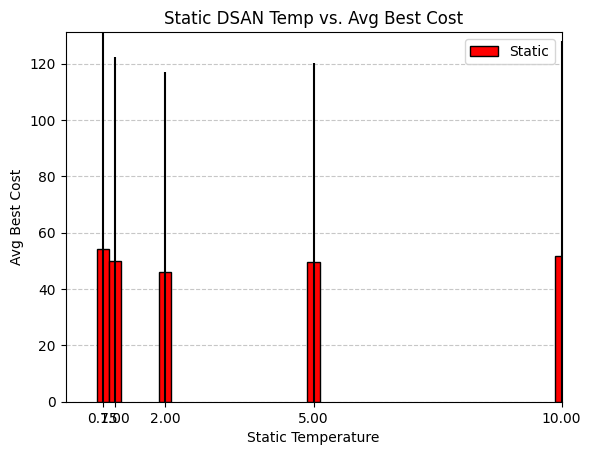

<Figure size 640x480 with 0 Axes>

In [19]:
static_std_dev = {k: np.std(v) for k,v in static_t_costs_arr.items()}
static_std_dev = {k:v for k,v in static_std_dev.items() if v > 0}
print(static_std_dev)
plt.bar(static_t_costs.keys(), static_t_costs.values(),yerr=static_std_dev.values() , width=.25, color='r', label='Static', edgecolor='black',  zorder=2)

# plot standard deviation
# make std_dev dict

#plt.errorbar(static_t_costs.keys(), static_t_costs.values(), yerr=std_dev.values(), fmt='none', color='g', label='Standard Deviation', zorder=3)

plt.ylim(0, max(static_t_costs.values()) + max(static_std_dev.values()))  # Adjust the upper limit as needed
plt.xlim(0, 1)
plt.xticks(t_vals)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Static Temperature')
plt.ylabel('Avg Best Cost')
plt.title('Static DSAN Temp vs. Avg Best Cost')
plt.legend()
plt.show()
plt.clf()

{0.75: np.float64(54.05765944409802), 1.0: np.float64(49.84793936332617), 2.0: np.float64(46.0556536659259), 5.0: np.float64(49.68777216153954), 10.0: np.float64(51.867985289149956)}


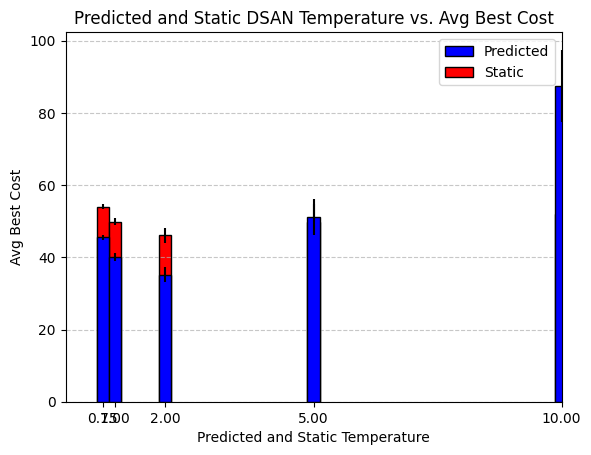

In [18]:

plt.bar(predicted_t_costs.keys(), predicted_t_costs.values(), yerr = pred_std_dev, width=.25, color='b', label='Predicted', edgecolor='black',  zorder=2)
plt.xlim(0, 1)
plt.xticks([k for k in t_costs.keys()])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Predicted and Static Temperature')
plt.ylabel('Avg Best Cost')
plt.title('Predicted and Static DSAN Temperature vs. Avg Best Cost')


print(static_t_costs)
plt.bar(static_t_costs.keys(), static_t_costs.values(), yerr = static_std_dev, width=.25, color='r', label='Static', edgecolor='black', zorder=1)
plt.legend()
plt.show()
    
# scatter plot
# plt.plot(t_costs.keys(), t_costs.values(), 'bo')

In [17]:
# save predicted_t_costs_arr and static_t_costs_arr to csv files

with open('DCOP_GRAPHS/DSAN/predicted_t_costs_arr.csv', 'w') as f:
    f.write("Predicted_Threshold, Best Costs Arr\n")
    for key, arr in predicted_t_costs_arr.items():
        f.write("%s,%s\n"%(key,arr))

with open('DCOP_GRAPHS/DSAN/static_t_costs_arr.csv', 'w') as f:
    f.write("Static_Threshold, Best Costs Arr\n")
    for key, arr in static_t_costs_arr.items():
        f.write("%s,%s\n"%(key,arr))